## random forest

<div dir=rtl style="text-align: left">

در این پروژه قصد داریم با استفاده از الگوریتم Random Forest بیماری قلبی را با توجه به ویژگی‌های مختلفی مانند سن، فشار خون، کلسترول و... پیش‌بینی کنیم.

</div>

In [228]:
# =====================
# import libraries
# =====================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [229]:
# =====================
# load dataset
# =====================

df = pd.read_csv("heart.csv")  # make sure the file is in the current directory


In [230]:
# =====================
# initial data info
# =====================

print("first rows")
print(df.head())

print("\nshape")
print(df.shape)

print("\ndatatypes")
print(df.dtypes)

print("\nmissing values")
print(df.isna().sum())


first rows
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

shape
(1025, 14)

datatypes
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

missing values
age         0
sex         0
cp 

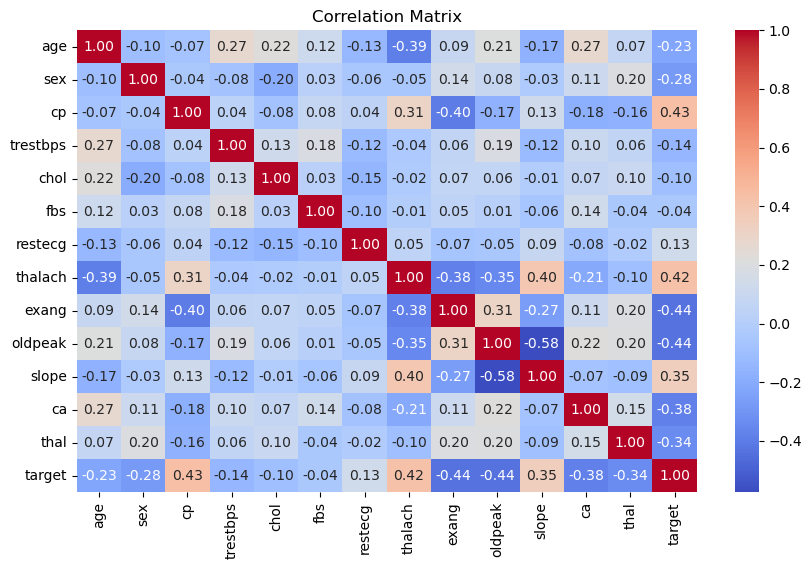

In [231]:
# =====================
# visualization
# =====================

#correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()



In [232]:
# =====================
# preprocessing
# =====================

# Define features and target
X = df.drop("target", axis=1)
y = df["target"]  # 1: disease present, 0: no disease

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")


Training samples: 820
Test samples: 205


In [233]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [10, 11, 12, None]
}

rf = RandomForestClassifier(n_estimators=100, random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best max_depth:", grid_search.best_params_['max_depth'])


Best max_depth: 11


In [234]:
# =====================
# train random forest model
# =====================

# Initialize and train model
model = RandomForestClassifier(n_estimators=100, max_depth=grid_search.best_params_['max_depth'])
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=11)

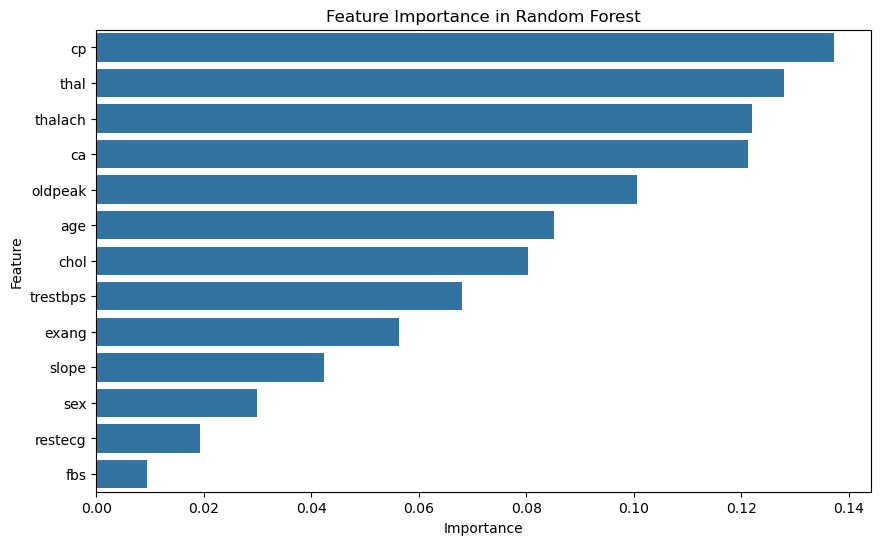

In [235]:
# Getting feature importance
feature_importance = model.feature_importances_

# Creating a DataFrame to visualize feature importance
feature_names = X_train.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sorting by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Random Forest')
plt.show()

In [236]:
# =====================
# model evaluation
# =====================

# Predictions
y_pred = model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.985
Confusion Matrix:
[[102   0]
 [  3 100]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [237]:
y_train_pred = model.predict(X_train)
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred):.3f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")


Training Accuracy: 1.000
Test Accuracy: 0.985


In [238]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validated accuracy: {np.mean(scores):.3f}")


Cross-validated accuracy: 0.997
